In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

from scipy.stats import percentileofscore

In [2]:
df = pd.read_csv("CleanedData.csv")

In [13]:
df.head(30)

,ID,App Session Platform,App Activity Type,App Session Date,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,...,Click Count,Unique Open Count,Unique Click Count,Rate,Purchase Amount USD,App Engagement,Open Rate,Click Rate,Subscription Duration,Free Trial Duration
0,2,android,App Launch,2019-12-03,EBR,Limited,INITIAL_PURCHASE,Web,39.000,USD,...,0.000,1.000,0.000,1.000,39.000,80,0.250,0.000,92,NaN
1,2,android,App Launch,2020-01-17,EBR,Limited,INITIAL_PURCHASE,Web,39.000,USD,...,0.000,1.000,0.000,1.000,39.000,80,0.250,0.000,92,NaN
2,2,android,Completed,2020-01-20,EBR,Limited,INITIAL_PURCHASE,Web,39.000,USD,...,0.000,1.000,0.000,1.000,39.000,80,0.250,0.000,92,NaN
3,2,android,App Launch,2019-12-31,EBR,Limited,INITIAL_PURCHASE,Web,39.000,USD,...,0.000,1.000,0.000,1.000,39.000,80,0.250,0.000,92,NaN
4,2,android,Start,2020-01-26,EBR,Limited,INITIAL_PURCHASE,Web,39.000,USD,...,0.000,1.000,0.000,1.000,39.000,80,0.250,0.000,92,NaN
5,2,android,Completed,2020-01-27,EBR,Limited,INITIAL_PURCHASE,Web,39.000,USD,...,0.000,1.000,0.000,1.000,39.000,80,0.250,0.000,92,NaN
6,2,android,App Launch,2020-01-19,EBR,Limited,INITIAL_PURCHASE,Web,39.000,USD,...,0.000,1.000,0.000,1.000,39.000,80,0.250,0.000,92,NaN
7,2,android,Other,2020-01-18,EBR,Limited,INITIAL_PURCHASE,Web,39.000,USD,...,0.000,1.000,0.000,1.000,39.000,80,0.250,0.000,92,NaN
8,2,android,App Launch,2020-02-26,EBR,Limited,INITIAL_PURCHASE,Web,39.000,USD,...,0.000,1.000,0.000,1.000,39.000,80,0.250,0.000,92,NaN
9,2,android,Completed,2020-01-09,EBR,Limited,INITIAL_PURCHASE,Web,39.000,USD,...,0.000,1.000,0.000,1.000,39.000,80,0.250,0.000,92,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386531 entries, 0 to 386530
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       386531 non-null  int64  
 1   App Session Platform     352627 non-null  object 
 2   App Activity Type        374690 non-null  object 
 3   App Session Date         374690 non-null  object 
 4   Language                 386531 non-null  object 
 5   Subscription Type        386531 non-null  object 
 6   Subscription Event Type  386531 non-null  object 
 7   Purchase Store           386531 non-null  object 
 8   Purchase Amount          386531 non-null  float64
 9   Currency                 386531 non-null  object 
 10  Subscription Start Date  386531 non-null  object 
 11  Subscription Expiration  386531 non-null  object 
 12  Demo User                386531 non-null  object 
 13  Free Trial User          386531 non-null  object 
 14  Free

In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df["Subscription Duration"].describe()

count   386531.000
mean      6279.716
std      11618.730
min         30.000
25%        182.000
50%        365.000
75%        731.000
max      29311.000
Name: Subscription Duration, dtype: float64

In [43]:
df.PurchaseAmountUSD.quantile(.90)

47824700.0

In [42]:
percentile = percentileofscore(df['PurchaseAmountUSD'], 1000)
print(percentile)

# A cutoff of 1000 keeps %88.30 of the data

88.30318879472048


In [45]:
purchase_data = df[df["PurchaseAmountUSD"] < 1000.0]
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64494 entries, 12 to 812034
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       64494 non-null  int64  
 1   Language                 64494 non-null  object 
 2   Subscription Type        64494 non-null  object 
 3   Subscription Event Type  64494 non-null  object 
 4   Purchase Store           64494 non-null  object 
 5   PurchaseAmountUSD        64494 non-null  float64
 6   Currency                 64494 non-null  object 
 7   Subscription Start Date  64494 non-null  object 
 8   Subscription Expiration  64494 non-null  object 
 9   Demo User                64494 non-null  object 
 10  Free Trial User          64494 non-null  object 
 11  Free Trial Start Date    64494 non-null  object 
 12  Free Trial Expiration    64494 non-null  object 
 13  Auto Renew               64494 non-null  object 
 14  Country             

<AxesSubplot: xlabel='PurchaseAmountUSD', ylabel='Count'>

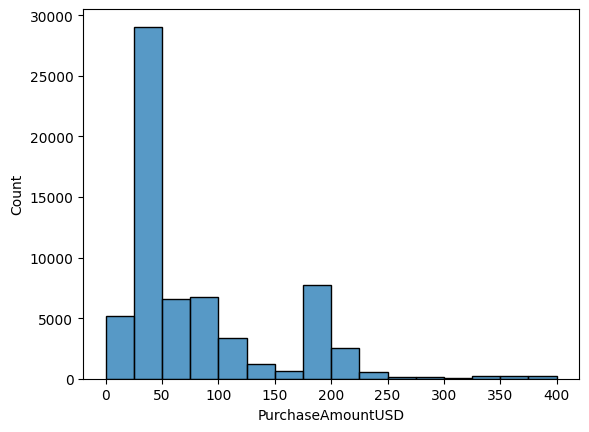

In [46]:
sns.histplot(data = purchase_data, x = "PurchaseAmountUSD", binwidth = 25)

In [47]:
# Purchase Info by Subscription Type
pd.set_option('display.float_format', lambda x: '%.3f' % x)
purchase_data.groupby("Subscription Type").PurchaseAmountUSD.describe()

,count,mean,std,min,25%,50%,75%,max
Subscription Type,,,,,,,,
Lifetime,11852.000,199.484,53.024,0.000,189.000,199.000,208.950,378.000
Limited,52642.000,55.209,40.620,0.000,35.970,39.000,68.362,376.200


In [48]:
# Purchase Info by Auto Renew or Not
pd.set_option('display.float_format', lambda x: '%.3f' % x)
purchase_data.groupby("Auto Renew").PurchaseAmountUSD.describe()

,count,mean,std,min,25%,50%,75%,max
Auto Renew,,,,,,,,
Off,40822.000,95.135,80.507,0.000,37.637,55.193,189.000,378.000
On,23672.000,58.591,39.512,0.000,35.970,39.000,75.714,296.432


In [49]:
# How many sessions are there for each subscription type
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# data of sub type
a = df.groupby("Subscription Type")
a['App Session Date'].count()

Subscription Type
Lifetime    11911
Limited     61126
Name: App Session Date, dtype: int64

In [50]:
# How many of each subscription
df.groupby('Subscription Type').ID.count()

Subscription Type
Lifetime    11911
Limited     61126
Name: ID, dtype: int64

In [51]:
lifetime_df = df[df["Subscription Type"] == "Lifetime"]
limited_df = df[df["Subscription Type"] == "Limited"]

In [52]:
print("Mean open count for lifetime users: ", lifetime_df['Open Count'].mean())
print("Mean open count for limited users: ", limited_df['Open Count'].mean())
print(" ")
print("Mean send count for lifetime users: ", lifetime_df['Send Count'].mean())
print("Mean send count for limited users: ", limited_df['Send Count'].mean())
print(" ")
print("Mean click count for lifetime users: ", lifetime_df['Click Count'].mean())
print("Mean click count for limited users: ", limited_df['Click Count'].mean())

Mean open count for lifetime users:  24.01208966501553
Mean open count for limited users:  19.36642345319504
 
Mean send count for lifetime users:  49.88456049030308
Mean send count for limited users:  38.420475738638224
 
Mean click count for lifetime users:  9.979850558307447
Mean click count for limited users:  12.172136243169845


[Text(0.5, 1.0, ' Mean Purchase Amount by Sub Type')]

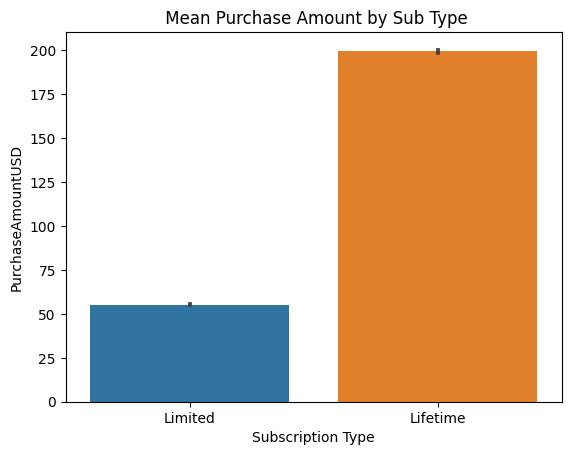

In [53]:
sns.barplot(data = purchase_data, x = "Subscription Type", y = "PurchaseAmountUSD").set(title = " Mean Purchase Amount by Sub Type")

<AxesSubplot: xlabel='Subscription Type', ylabel='Open Count'>

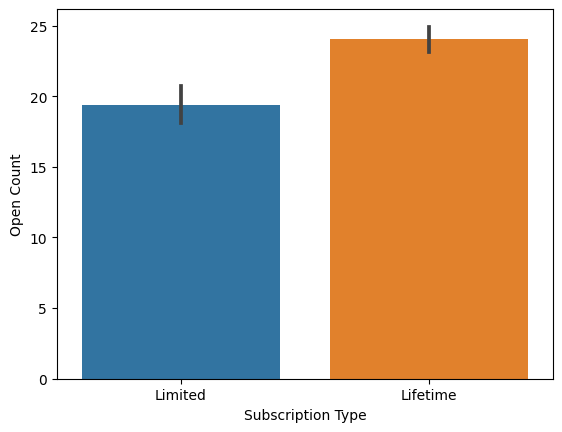

In [54]:
sns.barplot(data = df, x = "Subscription Type", y = "Open Count")

<AxesSubplot: xlabel='Subscription Type', ylabel='Send Count'>

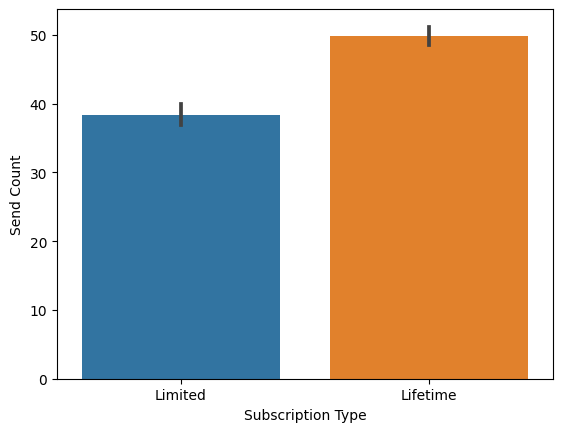

In [55]:
sns.barplot(data = df, x = "Subscription Type", y = "Send Count")

<AxesSubplot: xlabel='Subscription Type', ylabel='Click Count'>

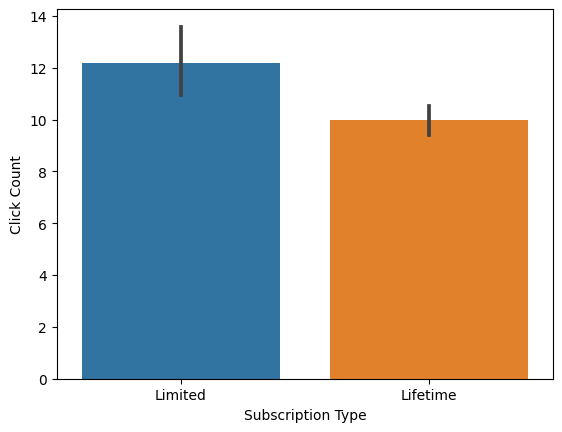

In [59]:
sns.barplot(data = df, x = "Subscription Type", y = "Click Count")